In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

In [17]:
TARGET_DIR = "E:\\"

SAMPLE_RATE = int(61.44e6) # samples per second

SEC_PER_SAMP = 1/SAMPLE_RATE
SEC_PER_PACKET = 0.0005 # play with this a bit; figure out using "proof by eyecrometers"
SAMP_PER_PACKET = SEC_PER_PACKET/SEC_PER_SAMP

NFFT_SIZE = int(SAMP_PER_PACKET)

print(NFFT_SIZE)

30720


The way I think of how NFFT works is "resolution" of the FFT calculation.
"How many samples does it take at a time to calculate the frequency domain?"
Ideally, it will calculate however long it takes for the monitor to send a transmission, so we calculate it one "hop" at a time.

See Tables 16.1 and 16.2 on pages 71 and 72 of the datasheet.
Tldr, the transmission time _per packet_ can be anywhere from 288 to 988 microseconds, depending on a number of variables.

In [18]:
def loadData(filepath):
    dat = np.fromfile(filepath, dtype="float32")
    dat = dat[0::2] + 1j*dat[1::2]
    return dat

def getMaxFreqs(spectrumDF, freqs):
    assert(len(spectrumDF) == len(freqs))

    maxFreqs = []

    i = 0
    for (columnIndex, columnData) in spectrumDF.items():
        maxFreqs.append(freqs[spectrumDF[[i]].idxmax()])
        i += 1

    return maxFreqs

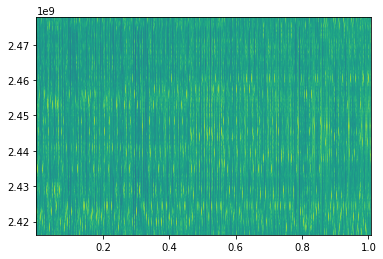

In [19]:
dat = loadData(f"{TARGET_DIR}normal2")
spectrum, freqs, t, im = plt.specgram(dat, NFFT=NFFT_SIZE, Fs=SAMPLE_RATE, Fc=2.447e9)

spectrumDF = pd.DataFrame(spectrum)
maxFreqs = getMaxFreqs(spectrumDF, freqs)

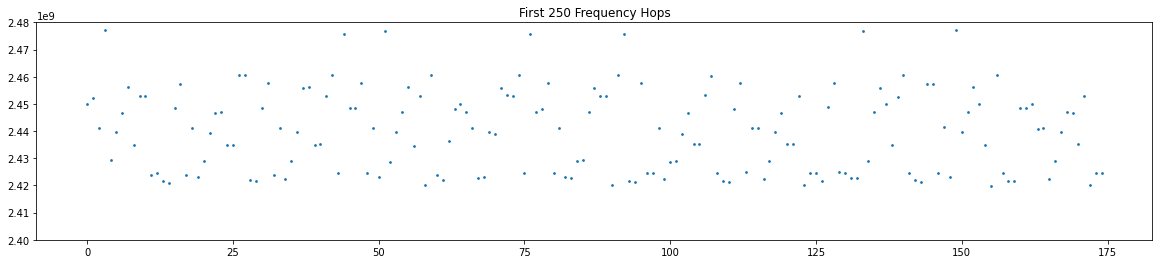

In [39]:
samp = maxFreqs[525:700]
plt.scatter(range(len(samp)), samp, 3)
# plt.plot(range(len(samp)), samp, 3)
plt.ylim([2.4e9, 2.48e9])
plt.gcf().set_figwidth(20)
plt.title("First 250 Frequency Hops")
plt.show()